## **EXPLORATORY DATA ANALYSIS**

In [1]:
# mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Importing necessary libraries**

In [2]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import pandas as pd
from glob import glob
import os
from matplotlib.patches import Rectangle

**2. Extracting the dataset from stage_2_dataset.zip**

In [4]:
path = "/content/drive/MyDrive/stage_2_dataset.zip"

In [5]:
from zipfile import ZipFile
with ZipFile(path,'r') as zip:
  zip.extractall()

In [6]:
!ls

'Copy of stage_2_detailed_class_info.csv'  'Copy of stage_2_train_labels.csv'   sample_data
'Copy of stage_2_test_images.rar'	    drive


**3. Extracting the train images from stage_2_train_images.zip file**

In [7]:
train_images_path = '/content/drive/MyDrive/stage_2_train_images.zip'

In [8]:
from zipfile import ZipFile
import os

# Path to the zip file
train_images_path = '/content/drive/MyDrive/stage_2_train_images.zip'

# Directory where you want to create the folder and extract the images
extraction_folder = '/content/stage_2_train_images'

# Create the extraction folder if it doesn't exist
os.makedirs(extraction_folder, exist_ok=True)

# Open the zip file
with ZipFile(train_images_path, 'r') as zip_ref:
    # Extract all images to the extraction folder
    zip_ref.extractall(extraction_folder)

print("Extraction complete.")



Extraction complete.


**4. Counting the number of images in the train folder**

In [9]:
normal = os.listdir("/content/stage_2_train_images")
print(len(normal))

26684


**5. Finding out the bit depth of the dicom images in the train folder**

In [10]:
import pydicom
import numpy as np

# Load the DICOM image
image = pydicom.dcmread('/content/stage_2_train_images/0004cfab-14fd-4e49-80ba-63a80b6bddd6.dcm')

# Get the data type of the image
data_type = image.pixel_array.dtype

# Determine the bit depth of the image
if data_type == np.uint8:
    bit_depth = 8
elif data_type == np.uint16:
    bit_depth = 16
elif data_type == np.uint32:
    bit_depth = 32
else:
    raise ValueError('Unsupported data type: {}'.format(data_type))

# Print the bit depth of the image
print('Bit depth:', bit_depth)



Bit depth: 8


**6. Finding out the pixel information of the train images**

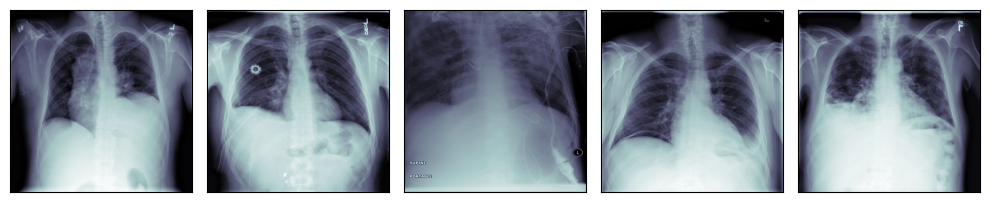

Dicom images shape is: (1024, 1024)


In [11]:
import glob

image_path = '/content/stage_2_train_images/*.dcm'

fig, axes = plt.subplots(ncols=5, figsize=(10, 10))
images = glob.glob(image_path)

for i, ax in enumerate(axes.flat):
    image_file = images[i]
    dicom_image = pydicom.dcmread(image_file)
    img = dicom_image.pixel_array
    ax.imshow(img, cmap='bone')
    #Remove (x,y)ticks
    ax.set_xticks([])
    ax.set_yticks([])

#Adjust spacing between subplots
plt.tight_layout()
plt.show()
print('Dicom images shape is:', img.shape)

**7. Reading the csv file into the dataframe**

In [12]:
import pandas as pd

class_info_df = pd.read_csv(os.path.join("Copy of stage_2_detailed_class_info.csv"))

In [13]:
class_info_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [14]:
class_info_df.columns

Index(['patientId', 'class'], dtype='object')

In [15]:
class_info_df.shape

(30227, 2)

In [16]:
class_info_df['patientId'].nunique()

26684

**8. Removing the duplicate entries of patient id**

In [17]:
df = class_info_df.copy()

In [18]:
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

In [20]:
len(df)

26684

In [21]:
df.isnull().sum()

patientId    0
class        0
dtype: int64

**9. Checking the metadata information in the dicom image files for an image**

In [22]:
patientId = df['patientId'][0]
dcm_file = '..//content/stage_2_train_images/%s.dcm' % patientId
dcm_data = pydicom.read_file(dcm_file)

print(dcm_data)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.28530.1517874485.775526
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

**10. Visualizing the distribution of the three distinct classes 'Normal', 'No Lung Opacity/ Not Normal', 'Lung Opacity'.**

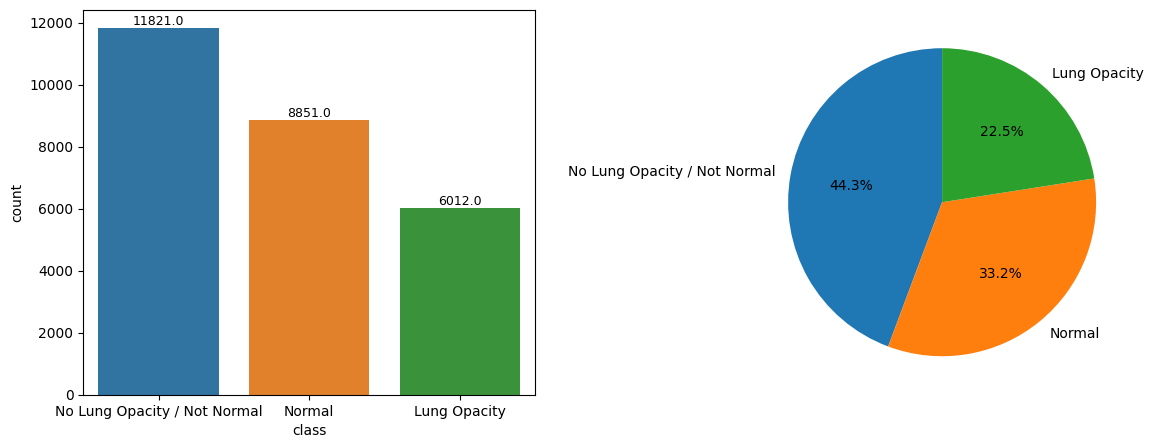

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, position 1
ax1 = sns.countplot(data=df, x='class')

# Display count over each bar
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, position 2
# Create a pie chart
category_counts = df['class'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)

# Adjust the distance between subplots
plt.subplots_adjust(wspace=0.4)

plt.show()



In [24]:
df['class'].value_counts()

No Lung Opacity / Not Normal    11821
Normal                           8851
Lung Opacity                     6012
Name: class, dtype: int64

**11. Creating a new column 'label' assigning value 1 for 'Lung Opacity' and 0 for 'No lung Opacity/Not Normal' & 'Normal' class**

In [25]:
df['label'] = df['class'].apply(lambda x: 1 if x == 'Lung Opacity' else 0)
df.head(10)

,patientId,class,label
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity,1
10,008c19e8-a820-403a-930a-bc74a4053664,No Lung Opacity / Not Normal,0
11,009482dc-3db5-48d4-8580-5c89c4f01334,Normal,0


In [26]:
df['patientId'] = df['patientId'].str.strip()

In [27]:
df['label'] = df['label'].astype(str)

In [28]:
df['label'].dtype

dtype('O')

**12. Creating a new column 'image_path' displaying the complete path to the train images**

In [29]:
import pandas as pd
import os

# Path to the directory containing DICOM images
image_folder = '/content/stage_2_train_images'

# Convert 'patientId' column to string explicitly
df['patientId'] = df['patientId'].astype(str)

# Create a new column 'image_path' by concatenating the folder path and 'patientId'
df['image_path'] = image_folder + os.path.sep + df['patientId'] + '.dcm'


In [30]:
df.head()

,patientId,class,label,image_path
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,0,/content/stage_2_train_images/0004cfab-14fd-4e...
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,0,/content/stage_2_train_images/00313ee0-9eaa-42...
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,0,/content/stage_2_train_images/00322d4d-1c29-49...
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,0,/content/stage_2_train_images/003d8fa0-6bf1-40...
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,1,/content/stage_2_train_images/00436515-870c-4b...


**13. Visualizing three random images from the three distinct classes**

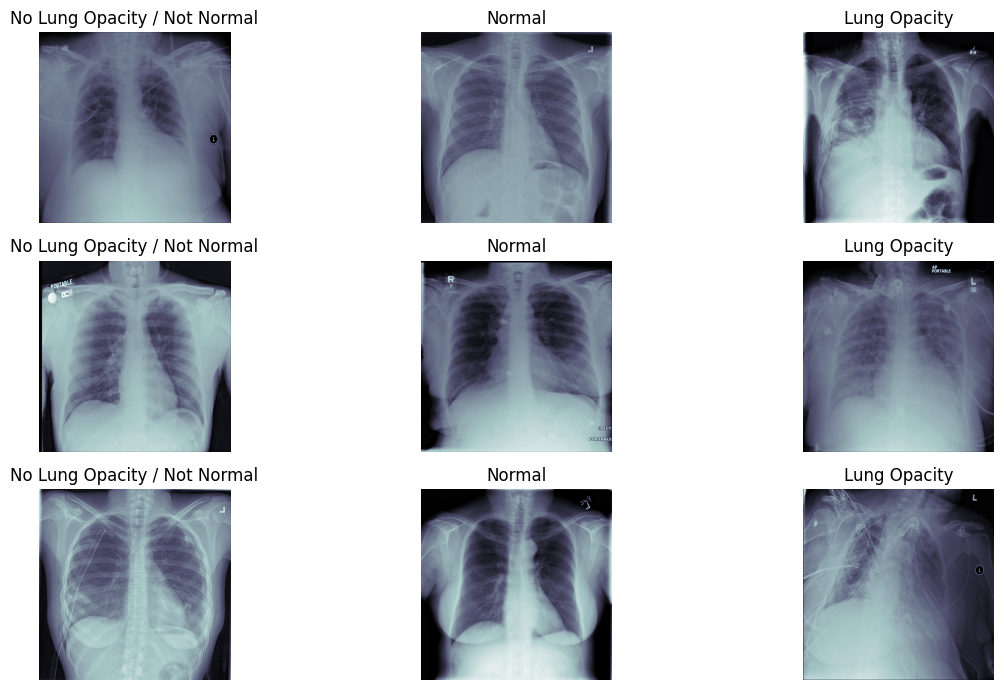

In [31]:
import pandas as pd
import pydicom
import matplotlib.pyplot as plt
import random

# Define the target classes
target_classes = df['class'].unique()

# Create subplots for displaying the images
fig, axes = plt.subplots(3, len(target_classes), figsize=(13, 7))

# Iterate through target classes
for i, target_class in enumerate(target_classes):
    class_df = df[df['class'] == target_class]

    # Select three random images for each class
    random_images = random.sample(class_df['image_path'].tolist(), 3)

    # Iterate through random images in the class
    for j, image_path in enumerate(random_images):
        # Read and display DICOM images
        dcm = pydicom.dcmread(image_path)
        axes[j, i].imshow(dcm.pixel_array, cmap=plt.cm.bone)
        axes[j, i].set_title(target_class)
        axes[j, i].axis('off')

plt.tight_layout()
plt.show()
